<a href="https://www.kaggle.com/code/lalit7881/student-performance-insights-80?scriptVersionId=297565843" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-dataset/ultimate_student_productivity_dataset_5000.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/student-performance-dataset/ultimate_student_productivity_dataset_5000.csv")

In [3]:
df.head()

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81


In [4]:
df.describe()

,student_id,age,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,screen_time_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,20.520400,4.539594,2.478734,2.011984,2.998086,1.564514,7.016492,6.979588,74.535600,251.450400,0.498200,0.501400,5.507400,29.431616,45.615324,37.267716,18.803752
std,1443.520003,2.870406,1.821665,1.177990,0.983906,1.467949,1.110807,1.163692,2.486214,42.932293,143.842712,0.500047,0.500048,2.869145,9.962902,14.246591,16.849397,12.130840
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1250.750000,18.000000,3.250000,1.660000,1.320000,1.990000,0.670000,6.237500,5.280000,37.000000,129.000000,0.000000,0.000000,3.000000,22.567500,35.727500,25.290000,9.337500
50%,2500.500000,20.000000,4.530000,2.480000,2.010000,2.980000,1.490000,7.010000,6.950000,75.000000,252.000000,0.000000,1.000000,5.000000,29.430000,45.690000,36.860000,18.010000
75%,3750.250000,23.000000,5.760000,3.290000,2.690000,4.030000,2.340000,7.810000,8.710000,112.000000,376.000000,1.000000,1.000000,8.000000,36.242500,55.352500,49.142500,27.400000
max,5000.000000,25.000000,11.840000,7.410000,6.000000,8.280000,5.640000,10.000000,15.300000,149.000000,499.000000,1.000000,1.000000,10.000000,63.480000,97.580000,98.020000,64.090000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   academic_level        5000 non-null   object 
 4   study_hours           5000 non-null   float64
 5   self_study_hours      5000 non-null   float64
 6   online_classes_hours  5000 non-null   float64
 7   social_media_hours    5000 non-null   float64
 8   gaming_hours          5000 non-null   float64
 9   sleep_hours           5000 non-null   float64
 10  screen_time_hours     5000 non-null   float64
 11  exercise_minutes      5000 non-null   int64  
 12  caffeine_intake_mg    5000 non-null   int64  
 13  part_time_job         5000 non-null   int64  
 14  upcoming_deadline     5000 non-null   int64  
 15  internet_quality     

In [6]:
df.dtypes

student_id                int64
age                       int64
gender                   object
academic_level           object
study_hours             float64
self_study_hours        float64
online_classes_hours    float64
social_media_hours      float64
gaming_hours            float64
sleep_hours             float64
screen_time_hours       float64
exercise_minutes          int64
caffeine_intake_mg        int64
part_time_job             int64
upcoming_deadline         int64
internet_quality         object
mental_health_score       int64
focus_index             float64
burnout_level           float64
productivity_score      float64
exam_score              float64
dtype: object

In [7]:
df.shape

(5000, 21)

In [8]:
df.isnull().sum()

student_id              0
age                     0
gender                  0
academic_level          0
study_hours             0
self_study_hours        0
online_classes_hours    0
social_media_hours      0
gaming_hours            0
sleep_hours             0
screen_time_hours       0
exercise_minutes        0
caffeine_intake_mg      0
part_time_job           0
upcoming_deadline       0
internet_quality        0
mental_health_score     0
focus_index             0
burnout_level           0
productivity_score      0
exam_score              0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

student_id              5000
age                       10
gender                     3
academic_level             3
study_hours              840
self_study_hours         552
online_classes_hours     462
social_media_hours       662
gaming_hours             463
sleep_hours              559
screen_time_hours       1089
exercise_minutes         150
caffeine_intake_mg       500
part_time_job              2
upcoming_deadline          2
internet_quality           3
mental_health_score       10
focus_index             2773
burnout_level           3256
productivity_score      3410
exam_score              2743
dtype: int64

In [11]:
df.columns

Index(['student_id', 'age', 'gender', 'academic_level', 'study_hours',
       'self_study_hours', 'online_classes_hours', 'social_media_hours',
       'gaming_hours', 'sleep_hours', 'screen_time_hours', 'exercise_minutes',
       'caffeine_intake_mg', 'part_time_job', 'upcoming_deadline',
       'internet_quality', 'mental_health_score', 'focus_index',
       'burnout_level', 'productivity_score', 'exam_score'],
      dtype='object')

In [12]:
cat_cols = df.describe(include='object').columns

In [13]:
for col in cat_cols:
    print(f'{col} -- {df[col].unique()}')

gender -- ['Other' 'Male' 'Female']
academic_level -- ['High School' 'Undergraduate' 'Postgraduate']
internet_quality -- ['Good' 'Poor' 'Average']


In [14]:
gender_map = {'Male':1, 'Female':0, 'Other':2}
acad_map = {'High School':0, 'Undergraduate':1, 'Postgraduate':2}
int_map = {'Good':1,  'Poor':0, 'Average':0.5}

In [15]:
df['gender'] = df['gender'].map(gender_map)
df['academic_level'] = df['academic_level'].map(acad_map)
df['internet_quality'] = df['internet_quality'].map(int_map)

In [16]:
df.head()

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,2,0,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,1.0,10,43.05,31.77,73.65,50.16
1,2,18,2,0,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,1.0,3,15.92,37.00,13.70,1.00
2,3,22,1,0,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,1.0,8,27.39,34.37,45.15,18.30
3,4,17,2,0,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,0.0,3,22.31,77.31,20.92,9.37
4,5,19,2,0,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,1.0,8,38.11,39.53,59.23,27.81


In [17]:
df.corr()['exam_score'].sort_values(ascending=False).head(10)

exam_score              1.000000
productivity_score      0.886401
focus_index             0.749879
mental_health_score     0.546547
study_hours             0.513434
sleep_hours             0.234710
self_study_hours        0.083602
exercise_minutes        0.040724
online_classes_hours    0.004975
academic_level         -0.005366
Name: exam_score, dtype: float64

## EDA

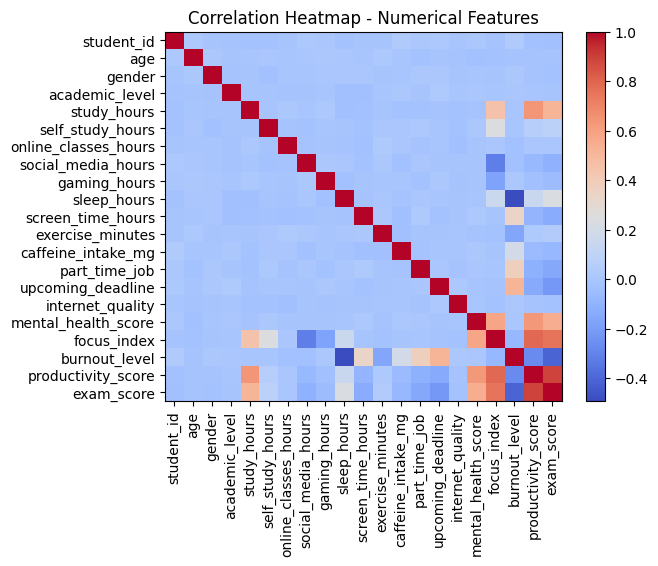

In [18]:
plt.figure()
corr = df.select_dtypes(include=np.number).corr()
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap - Numerical Features")
plt.show()

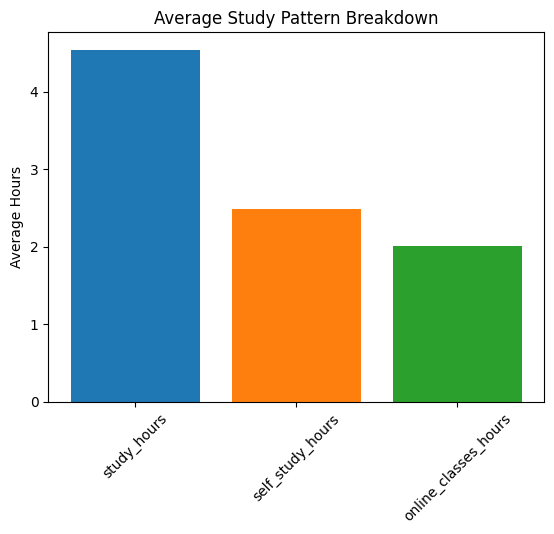

In [19]:
plt.figure()
study_data = df[['study_hours', 'self_study_hours', 'online_classes_hours']].mean()
plt.bar(study_data.index, study_data.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Average Study Pattern Breakdown")
plt.ylabel("Average Hours")
plt.xticks(rotation=45)
plt.show()


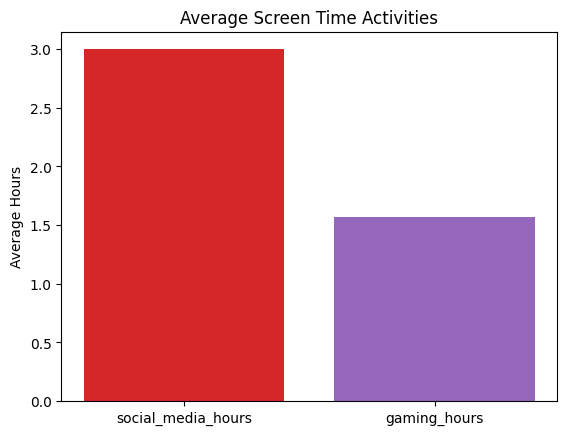

In [20]:
plt.figure()
screen_data = df[['social_media_hours', 'gaming_hours']].mean()
plt.bar(screen_data.index, screen_data.values, color=['#d62728', '#9467bd'])
plt.title("Average Screen Time Activities")
plt.ylabel("Average Hours")
plt.show()

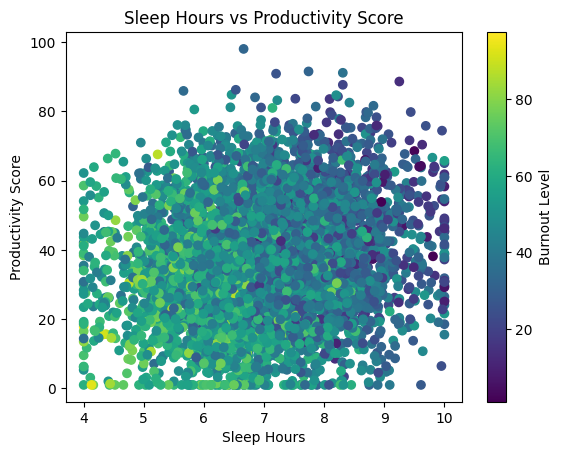

In [21]:
plt.figure()
plt.scatter(df['sleep_hours'], df['productivity_score'], 
            c=df['burnout_level'], cmap='viridis')
plt.colorbar(label="Burnout Level")
plt.title("Sleep Hours vs Productivity Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Productivity Score")
plt.show()

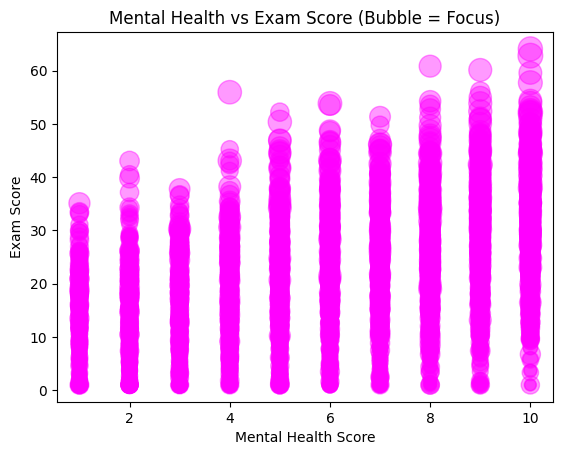

In [22]:
plt.figure()
sizes = df['focus_index'] * 5
plt.scatter(df['mental_health_score'], df['exam_score'],
            s=sizes, alpha=0.4, color='magenta')
plt.title("Mental Health vs Exam Score (Bubble = Focus)")
plt.xlabel("Mental Health Score")
plt.ylabel("Exam Score")
plt.show()

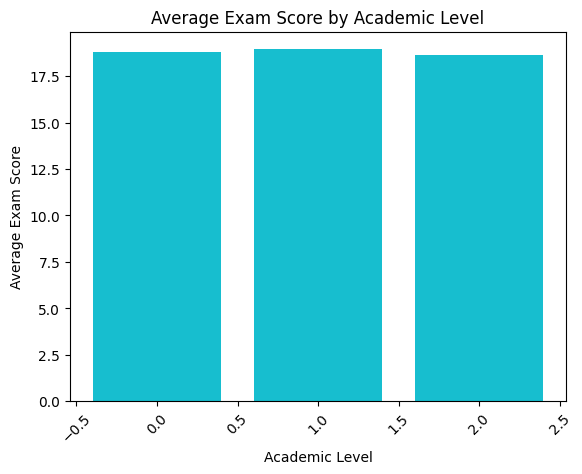

In [23]:
plt.figure()
academic_avg = df.groupby('academic_level')['exam_score'].mean()
plt.bar(academic_avg.index, academic_avg.values, color='#17becf')
plt.title("Average Exam Score by Academic Level")
plt.xlabel("Academic Level")
plt.ylabel("Average Exam Score")
plt.xticks(rotation=45)
plt.show()

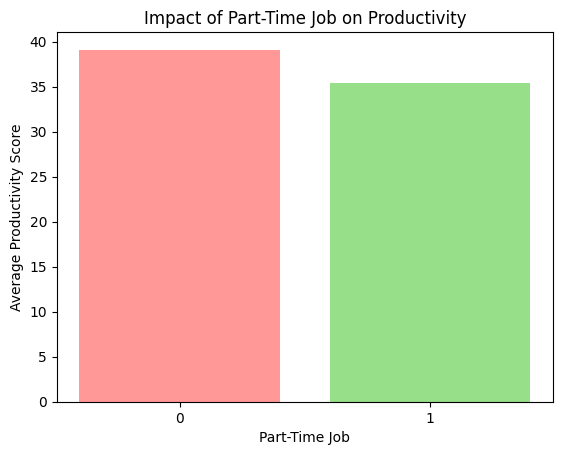

In [24]:
plt.figure()
job_productivity = df.groupby('part_time_job')['productivity_score'].mean()
plt.bar(job_productivity.index.astype(str), job_productivity.values, color=['#ff9896','#98df8a'])
plt.title("Impact of Part-Time Job on Productivity")
plt.xlabel("Part-Time Job")
plt.ylabel("Average Productivity Score")
plt.show()


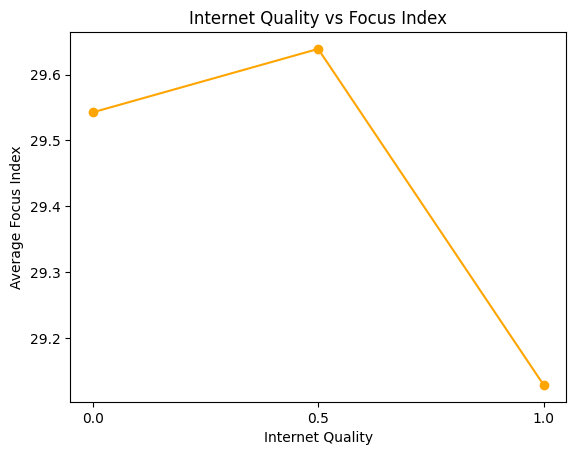

In [25]:
plt.figure()
internet_focus = df.groupby('internet_quality')['focus_index'].mean()
plt.plot(internet_focus.index.astype(str), internet_focus.values, marker='o', color='orange')
plt.title("Internet Quality vs Focus Index")
plt.xlabel("Internet Quality")
plt.ylabel("Average Focus Index")
plt.show()

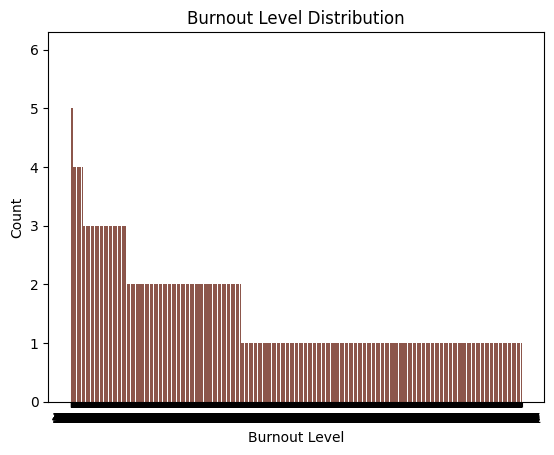

In [26]:
plt.figure()
burnout_counts = df['burnout_level'].value_counts()
plt.bar(burnout_counts.index.astype(str), burnout_counts.values, color='#8c564b')
plt.title("Burnout Level Distribution")
plt.xlabel("Burnout Level")
plt.ylabel("Count")
plt.show()

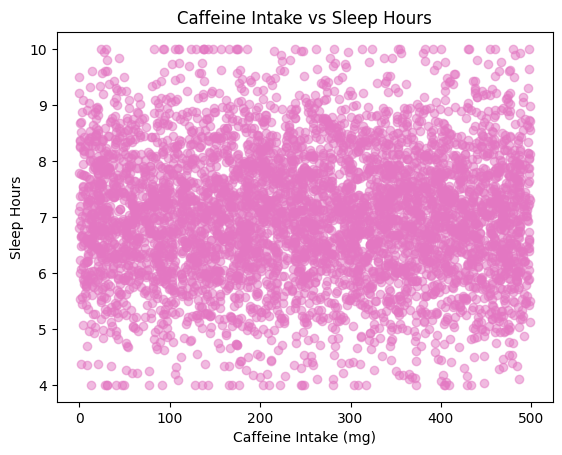

✅ All Advanced Visualizations Generated Successfully!


In [27]:
plt.figure()
plt.scatter(df['caffeine_intake_mg'], df['sleep_hours'],
            color='#e377c2', alpha=0.5)
plt.title("Caffeine Intake vs Sleep Hours")
plt.xlabel("Caffeine Intake (mg)")
plt.ylabel("Sleep Hours")
plt.show()

print("✅ All Advanced Visualizations Generated Successfully!")

## Feature engg

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
X = df.drop(columns=['exam_score', 'student_id'])
y = df['exam_score']


In [30]:
X = pd.get_dummies(X, drop_first=True)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca)

print("Original Features:", X.shape[1])
print("Reduced Features after PCA:", df_pca.shape[1])
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Original Features: 19
Reduced Features after PCA: 16
Explained Variance Ratio:
[0.145103   0.09798149 0.05951485 0.05689207 0.05542043 0.0541071
 0.05403745 0.05382344 0.05339494 0.05281337 0.05199546 0.0515502
 0.05084785 0.05003911 0.0495467  0.04755277]


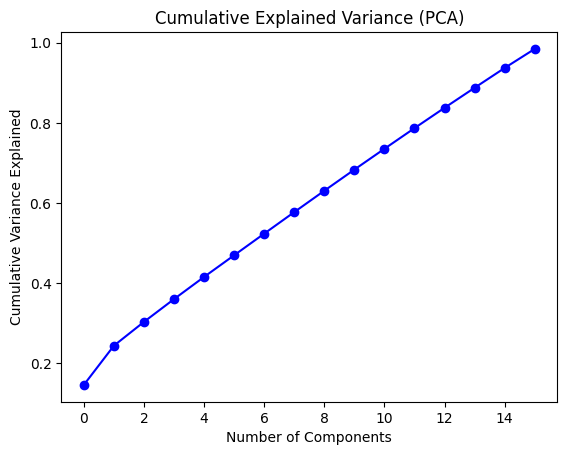

In [33]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='blue')
plt.title("Cumulative Explained Variance (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.show()

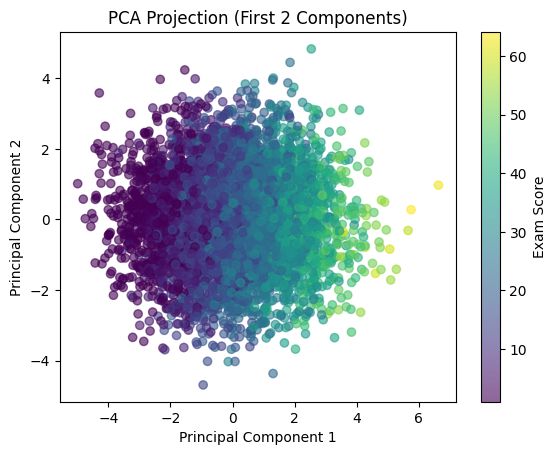

✅ PCA Analysis Completed Successfully!


In [34]:
if df_pca.shape[1] >= 2:
    plt.figure()
    plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], 
                c=y, cmap='viridis', alpha=0.6)
    plt.colorbar(label="Exam Score")
    plt.title("PCA Projection (First 2 Components)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

print("✅ PCA Analysis Completed Successfully!")

In [35]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by component:", explained_variance)

Explained variance by component: [0.145103   0.09798149 0.05951485 0.05689207 0.05542043 0.0541071
 0.05403745 0.05382344 0.05339494 0.05281337 0.05199546 0.0515502
 0.05084785 0.05003911 0.0495467  0.04755277]


In [36]:
columns = [f'feature_{i}' for i in range(1,17)]

In [37]:
df_pca.columns = columns

In [38]:
df_pca.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16
0,3.270075,0.051678,1.243257,1.899068,0.869354,0.470056,0.035259,0.610679,-0.413265,-0.715776,0.221120,0.860640,1.723980,0.539153,1.058012,-0.459509
1,-2.062117,-1.519320,-0.189127,-0.397445,0.229501,0.629435,-1.307233,0.946374,0.485071,-0.118472,-0.762062,1.263374,2.097803,0.407595,-0.428256,-0.721587
2,0.453865,-0.686379,-0.416957,0.555475,2.216372,1.284378,-0.107044,0.324041,1.976176,0.091700,-1.242334,0.589528,-1.187460,0.501465,-0.002111,-1.439380
3,-2.010023,2.625840,0.314509,0.884653,-1.579232,1.494641,-0.553257,0.555828,-0.930443,-0.215494,-0.378991,1.271793,0.079322,1.153433,-1.808053,0.365654
4,2.228661,-0.118497,-0.165750,2.736929,-0.142999,0.881960,0.292674,1.985823,-0.404470,-0.609706,0.123333,0.289817,1.033330,0.595373,0.616068,0.725033


In [39]:
df_pca['exam_score'] = y.reset_index(drop=True)

In [40]:
X = df.drop(columns=['exam_score', 'student_id'])


In [41]:
X = df_pca.drop(columns=['exam_score'])


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use PCA features directly
X = X_pca
y = df['exam_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Number of PCA Components:", X.shape[1])
print("Intercept:", lr.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


Number of PCA Components: 16
Intercept: 18.831355886120758
MSE: 27.0018682433773
RMSE: 5.196332191399748
R²: 0.8018357092050783


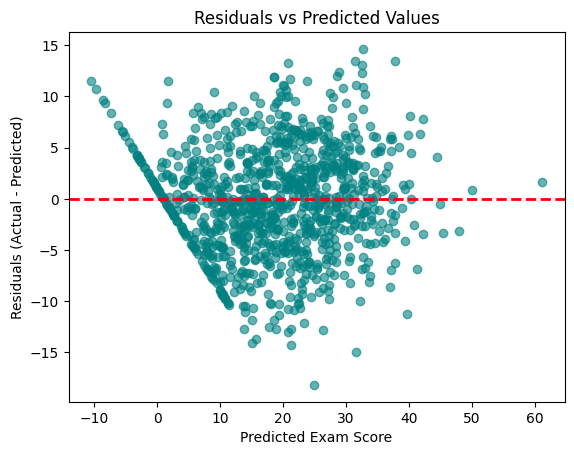

In [43]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, alpha=0.6, color='teal')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")

plt.show()

In [44]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Add constant (intercept)
X_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_const).fit()

# Durbin-Watson statistic
dw_stat = durbin_watson(model.resid)

print("Durbin-Watson statistic:", dw_stat)


Durbin-Watson statistic: 2.0439517724226546


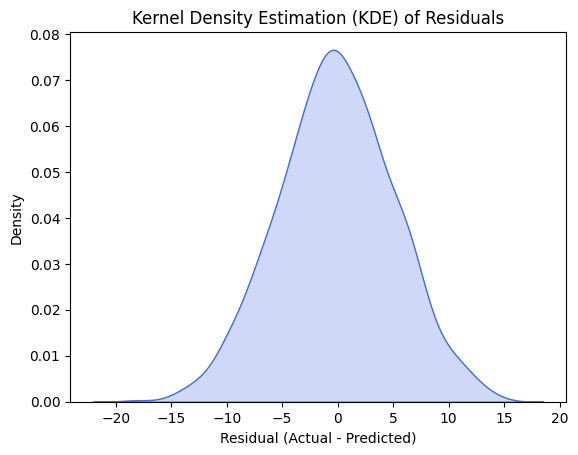

In [45]:
residuals = y_test - y_pred

plt.figure()
sns.kdeplot(residuals, fill=True, color='royalblue')
plt.title("Kernel Density Estimation (KDE) of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Density")
plt.show()

## Thank you..pls upvote!!!